In [9]:
import numpy as np

class NeuralNetwork:
    def __init__(self, layers, alpha=0.1):
        self.W=[]
        self.layers = layers
        self.alpha = alpha
        
        # start looping from the index of the first layer but
        # stop before we reach the last two layers
        for i in np.arange(0, len(layers) - 2):
            # randomly initialize a weight matrix connecting the
            # number of nodes in each respective layer together,
            # adding an extra node for the bias
            w = np.random.randn(layers[i], layers[i + 1])
            self.W.append(w / np.sqrt(layers[i]))
            
        # the last two layers are a special case where the input
        # connections need a bias term but the output does not
        w = np.random.randn(layers[-2], layers[-1])
        self.W.append(w / np.sqrt(layers[-2]))
    
    def __repr__(self):
        # construct and return a string that represents the network
        # architecture
        return "NeuralNetwork: {}".format("-".join(str(l) for l in self.layers))
    
    def sigmoid(self, x):
        # compute and return the sigmoid activation value for a
        # given input value
        return 1.0 / (1 + np.exp(-x))
    
    def sigmoid_deriv(self, x):
        # compute the derivative of the sigmoid function ASSUMING
        # that x has already been passed through the 'sigmoid'
        # function
        return x * (1 - x)
    
    def fit(self, X, y, epochs=1000, displayUpdate=100):
        # insert a column of 1's as the last entry in the feature
        # matrix -- this little trick allows us to treat the bias
        # as a trainable parameter within the weight matrix
        # X = np.c_[X, np.ones((X.shape[0]))]
        # loop over the desired number of epochs
        losses = []
        for epoch in np.arange(0, epochs):
            # loop over each individual data point and train
            # our network on it
            for (x, target) in zip(X, y):
                self.fit_partial(x, target)
            # check to see if we should display a training update
            if epoch == 0 or (epoch + 1) % displayUpdate == 0:
                loss = self.calculate_loss(X, y)
                losses.append(loss)
                print("[INFO] epoch={}, loss={:.7f}".format(epoch + 1, loss))
        return losses
                
    def fit_partial(self, x, y):
        # construct our list of output activations for each layer
        # as our data point flows through the network; the first
        # activation is a special case -- it's just the input
        # feature vector itself
        A = [np.atleast_2d(x)]
        
        # FEEDFORWARD:
        # loop over the layers in the network
        for layer in np.arange(0, len(self.W)):
            # feedforward the activation at the current layer by
            # taking the dot product between the activation and
            # the weight matrix -- this is called the "net input"
            # to the current layer
            net = A[layer].dot(self.W[layer])
            # computing the "net output" is simply applying our
            # nonlinear activation function to the net input
            out = self.sigmoid(net)
            # once we have the net output, add it to our list of
            # activations
            A.append(out)
            
        # BACKPROPAGATION
        # the first phase of backpropagation is to compute the
        # difference between our *prediction* (the final output
        # activation in the activations list) and the true target
        # value
        error = A[-1] - y
        # from here, we need to apply the chain rule and build our
        # list of deltas 'D'; the first entry in the deltas is
        # simply the error of the output layer times the derivative
        # of our activation function for the output value
        D = [error * self.sigmoid_deriv(A[-1])]
        
        # once you understand the chain rule it becomes super easy
        # to implement with a 'for' loop -- simply loop over the
        # layers in reverse order (ignoring the last two since we
        # already have taken them into account)
        for layer in np.arange(len(A) - 2, 0, -1):
            # the delta for the current layer is equal to the delta
            # of the *previous layer* dotted with the weight matrix
            # of the current layer, followed by multiplying the delta
            # by the derivative of the nonlinear activation function
            # for the activations of the current layer
            delta = D[-1].dot(self.W[layer].T)
            delta = delta * self.sigmoid_deriv(A[layer])
            D.append(delta)
            
        # since we looped over our layers in reverse order we need to
        # reverse the deltas
        D = D[::-1]
        # WEIGHT UPDATE PHASE
        # loop over the layers
        for layer in np.arange(0, len(self.W)):
            # update our weights by taking the dot product of the layer
            # activations with their respective deltas, then multiplying
            # this value by some small learning rate and adding to our
            # weight matrix -- this is where the actual "learning" takes
            # place
            self.W[layer] += -self.alpha * A[layer].T.dot(D[layer])
            
    def predict(self, X, addBias=True):
        # initialize the output prediction as the input features -- this
        # value will be (forward) propagated through the network to
        # obtain the final prediction
        p = np.atleast_2d(X)
        # check to see if the bias column should be added
        if addBias:
            # insert a column of 1's as the last entry in the feature
            # matrix (bias)
            p = np.c_[p, np.ones((p.shape[0]))]
        # loop over our layers in the network
        hidden_layers = []
        for layer in np.arange(0, len(self.W)):
            # computing the output prediction is as simple as taking
            # the dot product between the current activation value 'p'
            # and the weight matrix associated with the current layer,
            # then passing this value through a nonlinear activation
            # function
            if layer == 1:
                hidden_layers.append(p)
            p = self.sigmoid(np.dot(p, self.W[layer]))
        # return the predicted value
        return p, hidden_layers
    
    def calculate_loss(self, X, targets):
        # make predictions for the input data points then compute
        # the loss
        targets = np.atleast_2d(targets)
        predictions, hidden_layers = self.predict(X, addBias=False)
        loss = 0.5 * np.sum((predictions - targets) ** 2)
        # return the loss
        return loss

In [10]:
# construct the 3 bit parity dataset
X = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]])
y = np.array([[0], [1], [1], [0], [1], [0], [0], [1]])

In [43]:
# construct the 3 bit parity dataset
X = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]])
y = np.array([[0], [1], [1], [0], [1], [0], [0], [1]])

# define our 3-3-1 neural network and train it
nn = NeuralNetwork([3, 3, 1], alpha=0.5)
losses = nn.fit(X, y, epochs=10000)

[INFO] epoch=1, loss=1.0122092
[INFO] epoch=100, loss=0.9996666
[INFO] epoch=200, loss=0.9993121
[INFO] epoch=300, loss=0.9990070
[INFO] epoch=400, loss=0.9985465
[INFO] epoch=500, loss=0.9977926
[INFO] epoch=600, loss=0.9964707
[INFO] epoch=700, loss=0.9937718
[INFO] epoch=800, loss=0.9872961
[INFO] epoch=900, loss=0.9703535
[INFO] epoch=1000, loss=0.9272899
[INFO] epoch=1100, loss=0.8371826
[INFO] epoch=1200, loss=0.7313120
[INFO] epoch=1300, loss=0.6007615
[INFO] epoch=1400, loss=0.4073958
[INFO] epoch=1500, loss=0.2184993
[INFO] epoch=1600, loss=0.1488159
[INFO] epoch=1700, loss=0.1144001
[INFO] epoch=1800, loss=0.0926794
[INFO] epoch=1900, loss=0.0776321
[INFO] epoch=2000, loss=0.0666101
[INFO] epoch=2100, loss=0.0582032
[INFO] epoch=2200, loss=0.0515905
[INFO] epoch=2300, loss=0.0462615
[INFO] epoch=2400, loss=0.0418816
[INFO] epoch=2500, loss=0.0382225
[INFO] epoch=2600, loss=0.0351231
[INFO] epoch=2700, loss=0.0324665
[INFO] epoch=2800, loss=0.0301662
[INFO] epoch=2900, loss=0.

In [44]:
from tabulate import tabulate

# Original
result = []
for idx, output in enumerate(y):
    output_inputs = np.append(output, X[idx])
    result.append(output_inputs)
    
print(tabulate(result, headers=['Output', 'x1', 'x2', 'x3']))

  Output    x1    x2    x3
--------  ----  ----  ----
       0     0     0     0
       1     0     0     1
       1     0     1     0
       0     0     1     1
       1     1     0     0
       0     1     0     1
       0     1     1     0
       1     1     1     1


In [45]:
# now that our network is trained, loop over the 3-bit parity data points
output_needed = []
hidden_layers_x = np.empty((0,3), int)
for (x, target) in zip(X, y):
    # make a prediction on the data point and display the result
    # to our console
    predictions, hidden_layers = nn.predict(x, addBias=False)
    pred = predictions[0][0]
    step = 1 if pred > 0.5 else 0
    
    hidden_layers_x = np.append(hidden_layers_x, np.array([hidden_layers[0][0]]), axis=0)
    
    needed_result = list(np.append([x, target[0], pred], hidden_layers[0][0]))
    output_needed.append(needed_result)
    
print(tabulate(output_needed, headers=['data', 'actual_output', 'pred_output', 'h1', 'h2', 'h3']))

data       actual_output    pred_output           h1        h2           h3
-------  ---------------  -------------  -----------  --------  -----------
[0 0 0]                0     0.0469595   0.5          0.5       0.5
[0 0 1]                1     0.946068    0.00430817   0.153403  0.00686743
[0 1 0]                1     0.964284    0.00431547   0.822488  0.999874
[0 1 1]                0     0.0265888   1.87528e-05  0.456397  0.982149
[1 0 0]                1     0.964105    0.99995      0.82713   0.00598079
[1 0 1]                0     0.0266356   0.988487     0.464378  4.16038e-05
[1 1 0]                0     0.00156573  0.988506     0.95684   0.979539
[1 1 1]                1     0.999881    0.271198     0.800683  0.24871


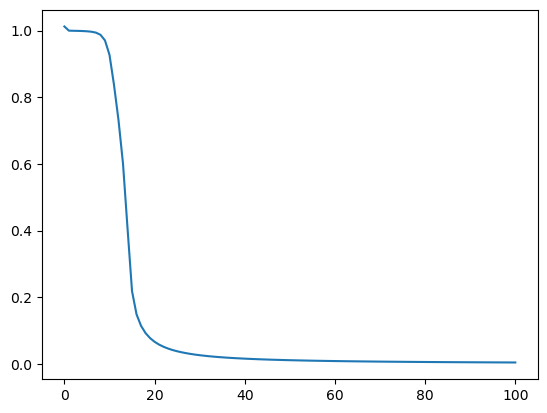

In [46]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.show()

In [47]:
layers = [3, 3, 1]
W = []
# start looping from the index of the first layer but
# stop before we reach the last two layers
for i in np.arange(0, len(layers) - 2):
    # randomly initialize a weight matrix connecting the
    # number of nodes in each respective layer together,
    # adding an extra node for the bias
    w = np.random.randn(layers[i], layers[i + 1])
    W.append(w / np.sqrt(layers[i]))

# the last two layers are a special case where the input
# connections need a bias term but the output does not
w = np.random.randn(layers[-2], layers[-1])
W.append(w / np.sqrt(layers[-2]))

print(W)

[array([[-0.53746713, -0.0933471 , -0.14801455],
       [-0.50153658,  0.69556718,  0.13319605],
       [ 0.14928735,  0.51427362,  0.23091732]]), array([[-1.06326824],
       [ 0.62420172],
       [ 0.5194934 ]])]


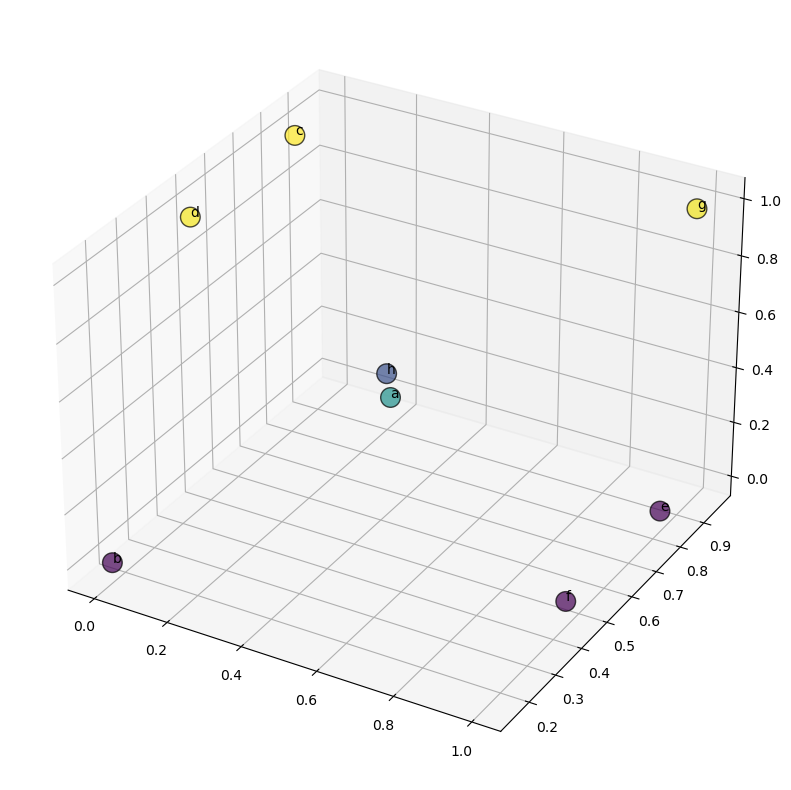

In [48]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

x = []
y = []
z = []
for h in hidden_layers_x:
    x.append(h[0])
    y.append(h[1])
    z.append(h[2])
    

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']

ax.scatter(x, y, z,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=z)

for item_x, item_y, item_z, label in zip(x, y, z, labels):
    ax.text(item_x, item_y, item_z, label)

plt.show()

In [ ]:
+